# Statistical Analysis

Hypothesis Tests

1. Chi-Square Test
2. Yet to be determined other hypothesis test

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chi-Square Test
- **Null Hypothesis:** There is no statistically significant relationship between sex and the number of tickets issued
- **Alternative Hypothesis:** There is a significant relationship betweeen sex and the number of tickets issued

In [3]:
data = pd.read_csv('data/Traffic_Violations (4).csv', low_memory = False)

In [4]:
data.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,07/30/2019,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,07/07/2019,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,07/10/2019,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,08/15/2019,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,04/15/2019,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [55]:
data.Gender.value_counts()

M    1081580
F     531186
U       2174
Name: Gender, dtype: int64

In [56]:
data = data[data.Gender != 'U']

In [57]:
data.Gender.value_counts()

M    1081580
F     531186
Name: Gender, dtype: int64

In [58]:
# groupby Gender and then get Race
# We will construct a contigency table out of this
data.groupby('Gender').Race.value_counts()

Gender  Race           
F       WHITE              212465
        BLACK              172393
        HISPANIC            80046
        ASIAN               36562
        OTHER               28684
        NATIVE AMERICAN      1036
M       WHITE              356819
        BLACK              339753
        HISPANIC           266071
        OTHER               59017
        ASIAN               57714
        NATIVE AMERICAN      2206
Name: Race, dtype: int64

In [59]:
contingency_table = pd.crosstab(data['Gender'], 
                              data['Race'], 
                              margins = True
                              )

In [61]:
contingency_table

Race,ASIAN,BLACK,HISPANIC,NATIVE AMERICAN,OTHER,WHITE,All
Gender,,,,,,,
F,36562,172393,80046,1036,28684,212465,531186
M,57714,339753,266071,2206,59017,356819,1081580
All,94276,512146,346117,3242,87701,569284,1612766


### Visuializing Contigency Table with Stacked Bar Chart

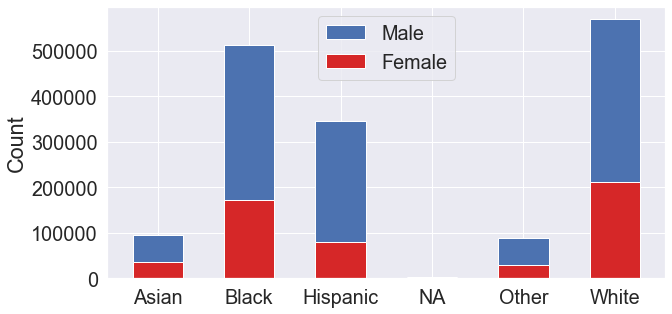

In [62]:
#Assigns the frequency values
malecount = contingency_table.iloc[0][0:6].values
femalecount = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["Asian","Black","Hispanic","NA","Other", "White"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('')
plt.ylabel('Count')
plt.show()

**The chart above visuializes our data.  If there was truly no relationship between Gender, Race, and the amount of traffic ciations, then the data would show an even ratio split between 'Male' and 'Female' for each category.**

In [63]:
f_obs = np.append(contingency_table.iloc[0][0:6].values, contingency_table.iloc[1][0:6].values)
f_obs

array([ 36562, 172393,  80046,   1036,  28684, 212465,  57714, 339753,
       266071,   2206,  59017, 356819], dtype=int64)

In [64]:
row_sums = contingency_table.iloc[0:2,6].values
row_sums


array([ 531186, 1081580], dtype=int64)

In [65]:
col_sums = contingency_table.iloc[2,0:6].values
col_sums

array([ 94276, 512146, 346117,   3242,  87701, 569284], dtype=int64)

In [66]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[31051.058452373127,
 168682.11827134254,
 113998.25192371367,
 1067.7959555198956,
 28885.49447719012,
 187501.28091986067,
 63224.94154762687,
 343463.88172865746,
 232118.74807628634,
 2174.2040444801046,
 58815.50552280988,
 381782.71908013936]

In [67]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 21617.90298907573


In [68]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 5


In [69]:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs

array([[ 36562, 172393,  80046,   1036,  28684, 212465],
       [ 57714, 339753, 266071,   2206,  59017, 356819]], dtype=int64)

In [70]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(21617.90298907573, 0.0, 5)